In [1]:
import numpy as np
from matplotlib import pyplot as plt

直行位相振幅　フリーラン

In [49]:
w = np.load('wdata_1photon-tes-anti_20220707_175649.npy')
t = np.load('tdata_1photon-tes-anti_20220707_175649.npy')

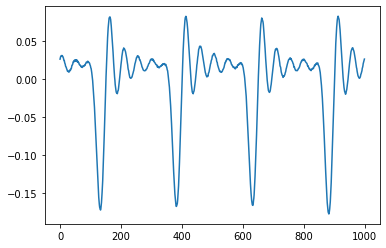

In [50]:
plt.plot(w[1,:])

In [51]:
w.shape

(20000, 1000)

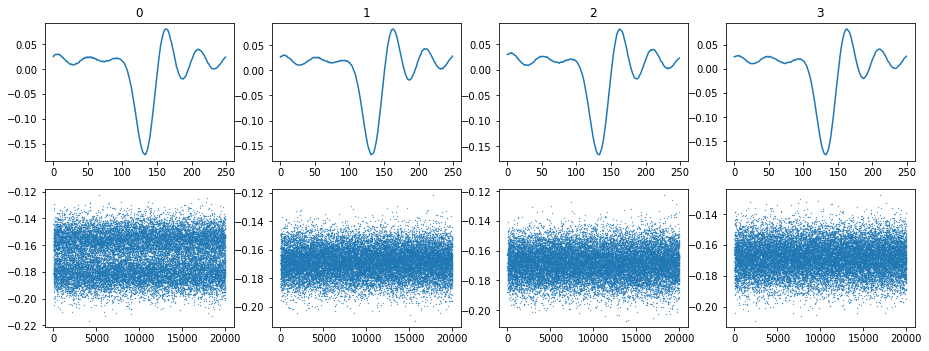

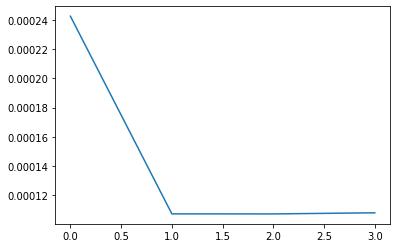

In [52]:
pulseNum = 4

period = [int(i * w.shape[1]/pulseNum) for i in range(10)]

volts = w.T

varList = []

fig = plt.figure(figsize = (40,30))

for i in range(pulseNum):
    s = period[i]
    duration = int(w.shape[1]/pulseNum)
    ax = fig.add_subplot(10,10,i+1)
    ax.plot(volts[s:(s+duration),1])
    ax.set_title(f'{i}')
    quadrature = volts[s + 130,:]
    # quadrature = volts[s:(s+duration),:].sum(axis=0)
    ax = fig.add_subplot(10,10,i+1 + 10)
    ax.scatter(range(quadrature.shape[0]),quadrature,s = 0.1)
#     ax.set_title(f'{i}')


# for i in range(pulseNum):
#     s = period[i]
#     duration = int(w.shape[1]/pulseNum)
#     quadrature = volts[s:(s+duration),:].sum(axis=0)
    varList.append(quadrature.var())

fig = plt.figure()
plt.plot(varList)

In [30]:
10*np.log10(6.25/13.24)

-3.2600796775960594

In [53]:
quadratures = np.zeros((20000, pulseNum))
for j in range(w.shape[0]):
    for i in range(pulseNum):
        s = period[i]
        #quadratures[j, i] = volts[s:s+duration, j].sum(axis=0)
        quadratures[j, i] = volts[s+130, j]

np.savetxt('1photon.txt', quadratures)

]

直行位相振幅 ショットノイズ

In [7]:
w = np.load('shotnoise_w.npy')
t = np.load('shotnoise_t.npy')

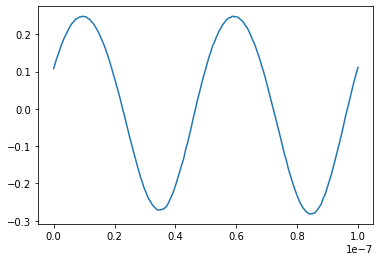

In [8]:
plt.plot(t,w[1,:])

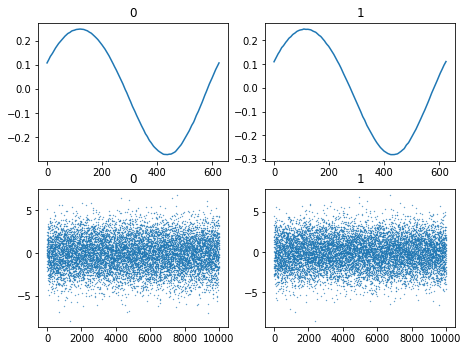

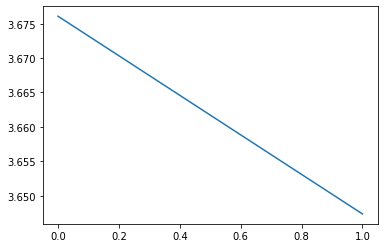

In [9]:
pulseNum = 2

period = [int(i * w.shape[1]/pulseNum) for i in range(10)]

volts = w.T

varList = []

fig = plt.figure(figsize = (40,30))

for i in range(pulseNum):
    s = period[i]
    duration = int(w.shape[1]/pulseNum)
    ax = fig.add_subplot(10,10,i+1)
    ax.plot(volts[s:(s+duration),1])
    ax.set_title(f'{i}')
    quadrature = volts[s:(s+duration),:].sum(axis=0)
    ax = fig.add_subplot(10,10,i+1 + 10)
    ax.scatter(range(w.shape[0]),quadrature,s = 0.1)
    ax.set_title(f'{i}')


varList = []

for i in range(pulseNum):
    s = period[i]
    duration = int(w.shape[1]/pulseNum)
    quadrature = volts[s:(s+duration),:].sum(axis=0)
    varList.append(quadrature.var())

fig = plt.figure()
plt.plot(varList)

In [10]:
w_shot = np.load('shotnoise_w.npy')
t_shot = np.load('shotnoise_t.npy')
w_free = np.load('freerun_w.npy')
t_free = np.load('freerun_t.npy')

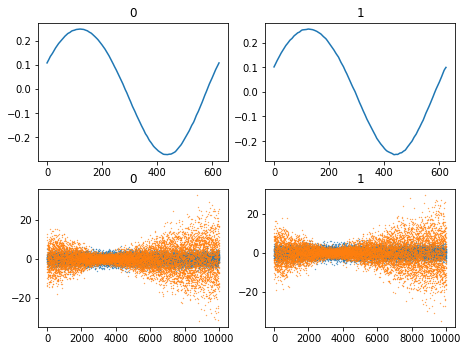

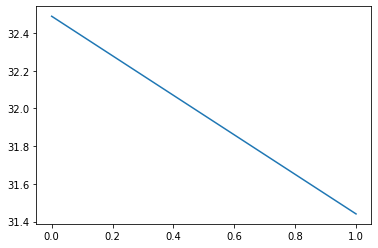

In [11]:
pulseNum = 2

period = [int(i * w.shape[1]/pulseNum) for i in range(10)]



varList = []

fig = plt.figure(figsize = (40,30))

for i in range(pulseNum):
    s = period[i]
    duration = int(w.shape[1]/pulseNum)
    ax = fig.add_subplot(10,10,i+1)
    ax.plot(volts[s:(s+duration),1])
    ax.set_title(f'{i}')
    volts = w_shot.T
    quadrature = volts[s:(s+duration),:].sum(axis=0)
    ax = fig.add_subplot(10,10,i+1 + 10)
    ax.scatter(range(w.shape[0]),quadrature,s = 0.1)
    volts = w_free.T
    quadrature = volts[s:(s+duration),:].sum(axis=0)
    ax.scatter(range(w.shape[0]),quadrature,s = 0.1)
    ax.set_title(f'{i}')


varList = []

for i in range(pulseNum):
    s = period[i]
    duration = int(w.shape[1]/pulseNum)
    quadrature = volts[s:(s+duration),:].sum(axis=0)
    varList.append(quadrature.var())

fig = plt.figure()
plt.plot(varList)

In [13]:
w = np.load('freerun_w.npy')
t = np.load('freerun_t.npy')

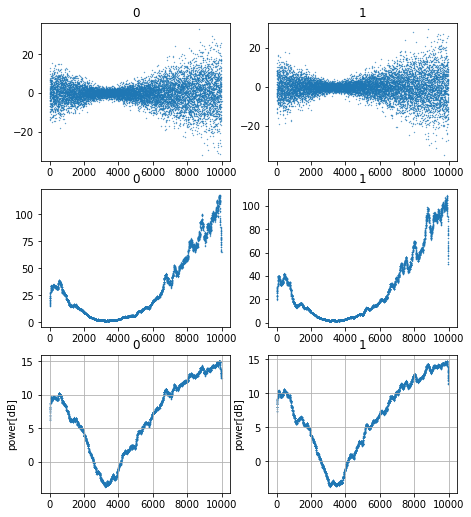

In [14]:
pulseNum = 2

period = [int(i * w.shape[1]/pulseNum) for i in range(10)]

volts = w.T

varList = []

fig = plt.figure(figsize = (40,30))

for i in range(pulseNum):
    s = period[i]
    duration = int(w.shape[1]/pulseNum)
    ax = fig.add_subplot(10,10,i+1)
    ax.set_title(f'{i}')
    quadrature = volts[s:(s+duration),:].sum(axis=0)
    ax.scatter(range(w.shape[0]),quadrature,s = 0.1)


    K = 200
    conv = np.ones(K)/K
    moving_var = np.convolve(quadrature**2, conv, mode="same") - np.convolve(quadrature, conv, mode="same")**2 
    ax = fig.add_subplot(10,10,i+1 + 10)
    ax.scatter(range(w.shape[0]),moving_var,s = 0.1)
    ax.set_title(f'{i}')

    ax = fig.add_subplot(10,10,i+1 + 20)
    ax.scatter(range(w.shape[0]), 10*np.log10(moving_var/3.66), s = 0.1)
    ax.set_title(f'{i}')
    ax.grid()
    ax.set_ylabel('power[dB]')




In [15]:
np.min(10*np.log10(moving_var/3.66))

-3.675228895306013